In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Load Data

In [3]:
nikkei = pd.read_csv('/content/drive/MyDrive/학교 과제/nikkei.csv')
kospi = pd.read_csv('/content/drive/MyDrive/학교 과제/kospi.csv')

In [4]:
nikkei.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-13,16319.110352,16335.379883,16019.179688,16019.179688,16019.179688,126200000.0
1,2016-06-14,16001.190430,16082.500000,15762.089844,15859.000000,15859.000000,131700000.0
2,2016-06-15,15799.070313,15997.299805,15752.009766,15919.580078,15919.580078,136800000.0
3,2016-06-16,15871.219727,15913.080078,15395.980469,15434.139648,15434.139648,154200000.0
4,2016-06-17,15631.790039,15774.870117,15582.940430,15599.660156,15599.660156,167200000.0


In [5]:
kospi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-13,2001.030029,2001.790039,1976.689941,1979.060059,1979.060059,443000
1,2016-06-14,1976.800049,1982.319946,1965.339966,1972.030029,1972.030029,439900
2,2016-06-15,1972.000000,1975.869995,1960.969971,1968.829956,1968.829956,376800
3,2016-06-16,1971.530029,1974.010010,1944.800049,1951.989990,1951.989990,438800
4,2016-06-17,1966.229980,1970.540039,1949.599976,1953.400024,1953.400024,485300


In [7]:
nan_df = nikkei[nikkei['Close'].isnull()]
nan_df

,Date,Open,High,Low,Close,Adj Close,Volume
270,2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN
289,2017-08-11,NaN,NaN,NaN,NaN,NaN,NaN
315,2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN
330,2017-10-09,NaN,NaN,NaN,NaN,NaN,NaN
349,2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN
363,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
390,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
391,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
392,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN
395,2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nikkei = nikkei.dropna()

In [14]:
nikkei.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
nikkei_close = nikkei['Close'].values
kospi_close = kospi['Close'].values

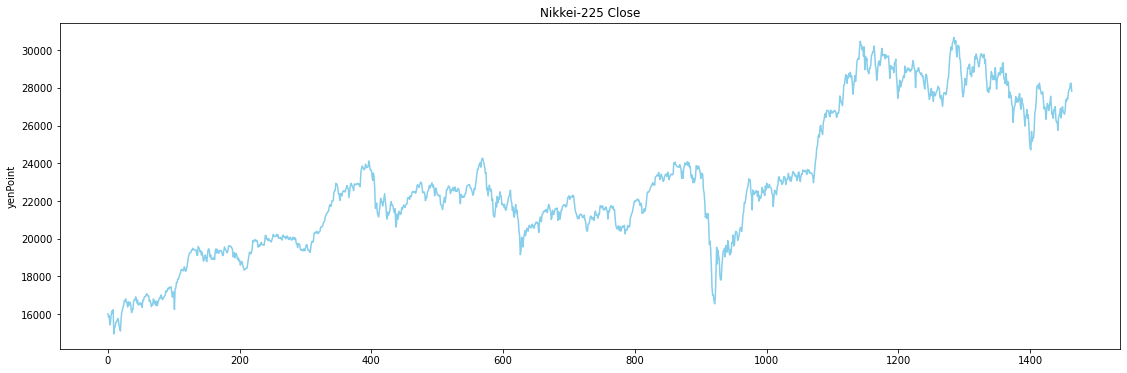

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(19, 6))
plt.plot(nikkei_close, 'skyblue')
plt.ylabel('yenPoint')
plt.title('Nikkei-225 Close')
plt.show()

plt.clf()

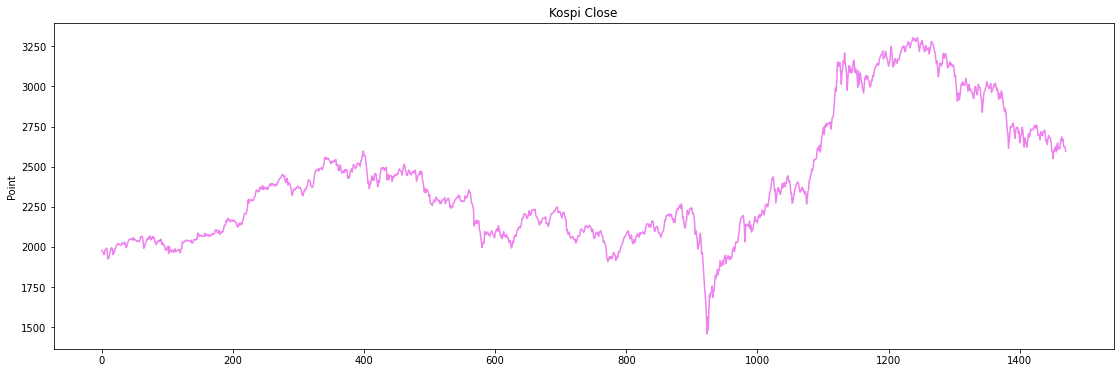

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(19,6))
plt.plot(kospi_close, 'violet')
plt.ylabel('Point')
plt.title('Kospi Close')
plt.show()

plt.clf()

# Create Window

In [18]:
seq_len = 50
sequence_length = seq_len + 1

result_nikkei = []
for index in range(len(nikkei_close) - sequence_length):
    result_nikkei.append(nikkei_close[index: index + sequence_length])

result_kospi = []
for index in range(len(kospi_close) - sequence_length):
    result_kospi.append(kospi_close[index: index + sequence_length])

# Normalize Data

In [19]:
normalized_nikkei = []
for window in result_nikkei:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_nikkei.append(normalized_window)

normalized_kospi = []
for window in result_kospi:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_kospi.append(normalized_window)

In [20]:
result_nikkei = np.array(normalized_nikkei)
result_kospi = np.array(normalized_kospi)

In [ ]:
print(result_nikkei[:5])

# Split Data

In [22]:
row_nikkei = int(round(result_nikkei.shape[0] * 0.9))
train_nikkei = result_nikkei[:row_nikkei, :]
np.random.shuffle(train_nikkei)

X_nikkei = train_nikkei[:, :-1]
X_nikkei = np.reshape(X_nikkei, (X_nikkei.shape[0], X_nikkei.shape[1], 1))
Y_nikkei = train_nikkei[:, -1]

x_nikkei = result_nikkei[row_nikkei:, :-1]
x_nikkei = np.reshape(x_nikkei, (x_nikkei.shape[0], x_nikkei.shape[1], 1))
y_nikkei = result_nikkei[row_nikkei:, -1]

print(X_nikkei.shape, x_nikkei.shape)

(1272, 50, 1) (141, 50, 1)


In [ ]:
print(X_nikkei[:5])

In [23]:
row_kospi = int(round(result_kospi.shape[0] * 0.9))
train_kospi = result_kospi[:row_kospi, :]
np.random.shuffle(train_kospi)

X_kospi = train_kospi[:, :-1]
X_kospi = np.reshape(X_kospi, (X_kospi.shape[0], X_kospi.shape[1], 1))
Y_kospi = train_kospi[:, -1]

x_kospi = result_kospi[row_kospi:, :-1]
x_kospi = np.reshape(x_kospi, (x_kospi.shape[0], x_kospi.shape[1], 1))
y_kospi = result_kospi[row_kospi:, -1]

print(X_kospi.shape, x_kospi.shape)

(1278, 50, 1) (142, 50, 1)


# Build LSTM for Nikkei

In [24]:
tf.keras.backend.clear_session()

model_nikkei = keras.Sequential()

model_nikkei.add(keras.layers.LSTM(32, return_sequences=True, input_shape=(50, 1)))
model_nikkei.add(keras.layers.LSTM(64, return_sequences=True))
model_nikkei.add(keras.layers.LSTM(64, return_sequences=True))
model_nikkei.add(keras.layers.LSTM(32, return_sequences=False))

model_nikkei.add(keras.layers.Dense(1, activation='linear'))

model_nikkei.compile(loss='mse', optimizer='adam')

model_nikkei.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            24832     
                                                                 
 lstm_2 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 74,657
Trainable params: 74,657
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_nikkei.fit(X_nikkei, Y_nikkei, validation_data=(x_nikkei, y_nikkei), batch_size=10, epochs=20)

Epoch 1/20
128/128 [==============================] - 12s 22ms/step - loss: 0.0014 - val_loss: 9.3405e-04
Epoch 2/20
128/128 [==============================] - 2s 12ms/step - loss: 7.8898e-04 - val_loss: 0.0012
Epoch 3/20
128/128 [==============================] - 1s 12ms/step - loss: 6.1464e-04 - val_loss: 6.0649e-04
Epoch 4/20
128/128 [==============================] - 2s 12ms/step - loss: 5.3570e-04 - val_loss: 4.1762e-04
Epoch 5/20
128/128 [==============================] - 2s 12ms/step - loss: 4.4094e-04 - val_loss: 5.6980e-04
Epoch 6/20
128/128 [==============================] - 2s 15ms/step - loss: 3.7639e-04 - val_loss: 3.9165e-04
Epoch 7/20
128/128 [==============================] - 1s 12ms/step - loss: 2.9799e-04 - val_loss: 2.8018e-04
Epoch 8/20
128/128 [==============================] - 2s 12ms/step - loss: 2.5099e-04 - val_loss: 2.5178e-04
Epoch 9/20
128/128 [==============================] - 2s 12ms/step - loss: 2.5220e-04 - val_loss: 2.2874e-04
Epoch 10/20
128/128 [=====

In [26]:
model_nikkei.save_weights('/content/drive/MyDrive/학교 과제/lstm_nikkei')

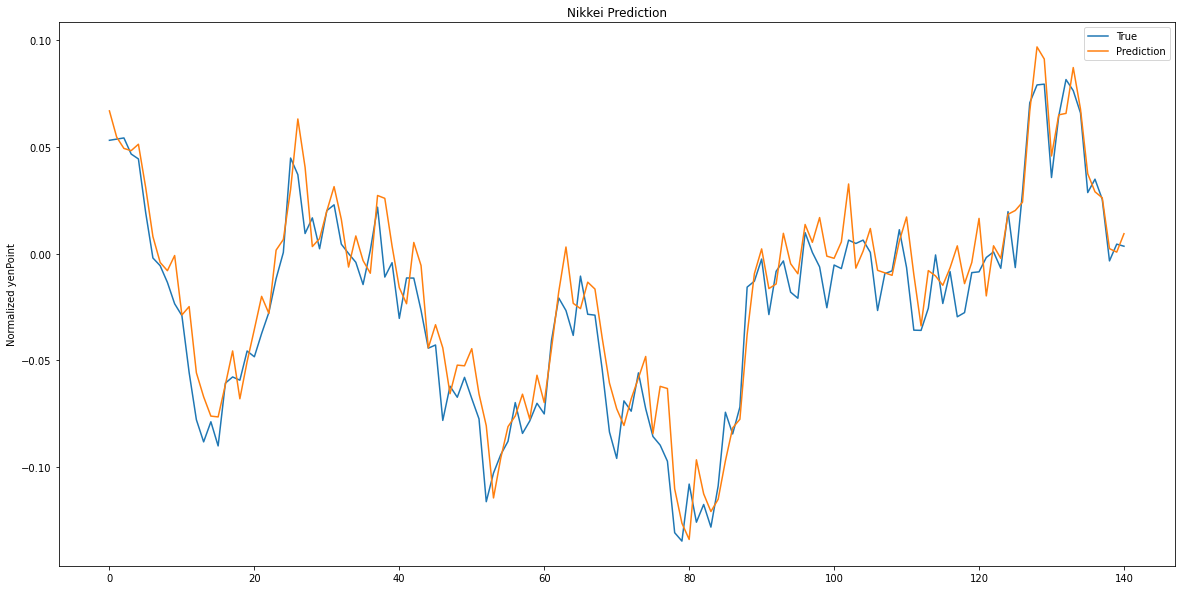

<Figure size 432x288 with 0 Axes>

In [33]:
pred_n2n = model_nikkei.predict(x_nikkei)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_nikkei, label='True')
ax.plot(pred_n2n, label='Prediction')
ax.legend()
plt.ylabel('Normalized yenPoint')
plt.title('Nikkei Prediction')
plt.show()

plt.clf()

In [28]:
model_kospi = keras.Sequential()

model_kospi.add(keras.layers.LSTM(32, return_sequences=True, input_shape=(50, 1)))
model_kospi.add(keras.layers.LSTM(64, return_sequences=True))
model_kospi.add(keras.layers.LSTM(64, return_sequences=True))
model_kospi.add(keras.layers.LSTM(32, return_sequences=False))

model_kospi.add(keras.layers.Dense(1, activation='linear'))

model_kospi.compile(loss='mse', optimizer='adam')

model_kospi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 32)            4352      
                                                                 
 lstm_5 (LSTM)               (None, 50, 64)            24832     
                                                                 
 lstm_6 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 74,657
Trainable params: 74,657
Non-trainable params: 0
_________________________________________________________________


# Training Models

In [ ]:
model_kospi.fit(X_kospi, Y_kospi, validation_data=(x_kospi, y_kospi), batch_size=10, epochs=20)

In [ ]:
model_kospi.save_weights('/content/drive/MyDrive/학교 과제/lstm_kospi')

In [29]:
model_kospi.load_weights('/content/drive/MyDrive/학교 과제/lstm_kospi')

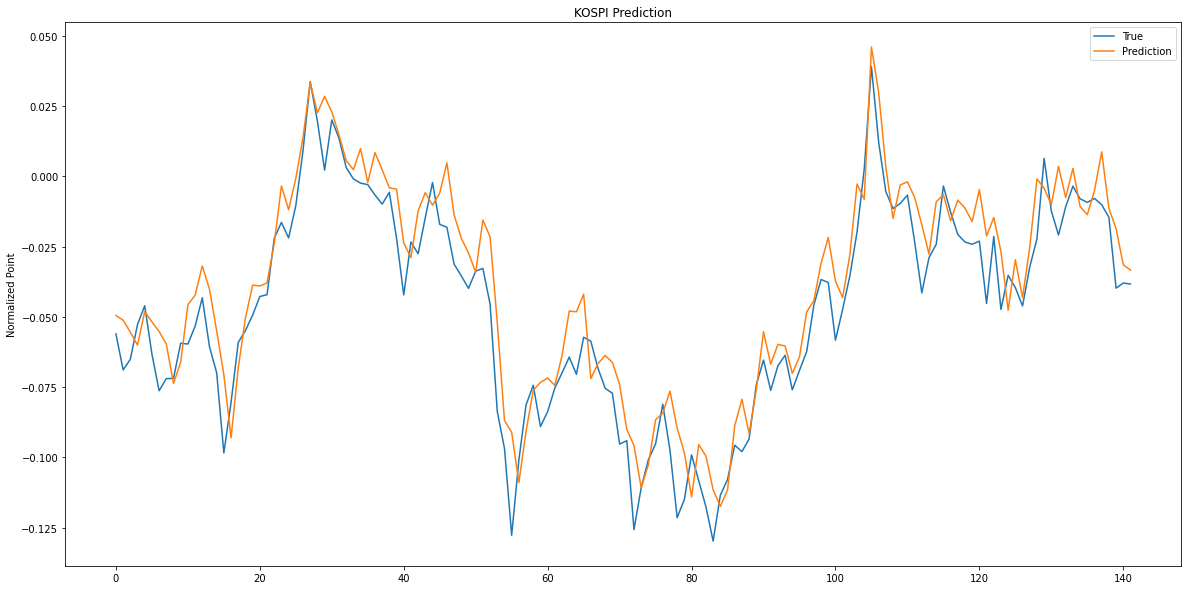

<Figure size 432x288 with 0 Axes>

In [34]:
pred_k2k = model_kospi.predict(x_kospi)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_kospi, label='True')
ax.plot(pred_k2k, label='Prediction')
ax.legend()
plt.ylabel('Normalized Point')
plt.title('KOSPI Prediction')
plt.show()

plt.clf()

# Cross Prediction

## NIKKEI Model to KOSPI GroundTruth

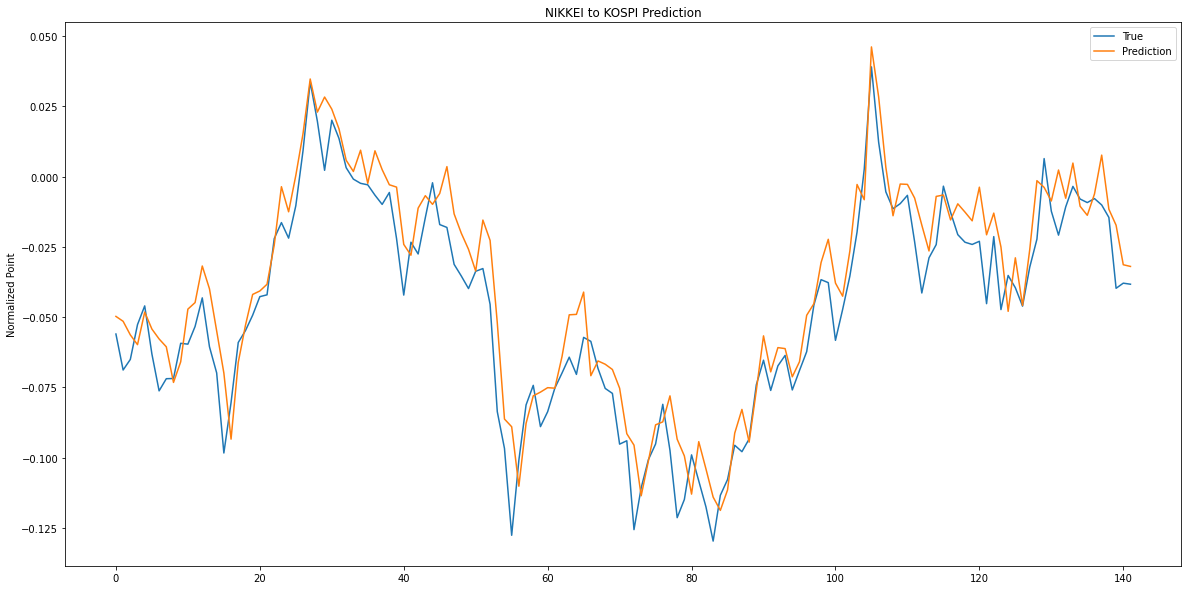

<Figure size 432x288 with 0 Axes>

In [35]:
pred_n2k = model_nikkei.predict(x_kospi)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_kospi, label='True')
ax.plot(pred_n2k, label='Prediction')
ax.legend()
plt.ylabel('Normalized Point')
plt.title('NIKKEI to KOSPI Prediction')
plt.show()

plt.clf()

## KOSPI Model to NIKKEI GroundTruth

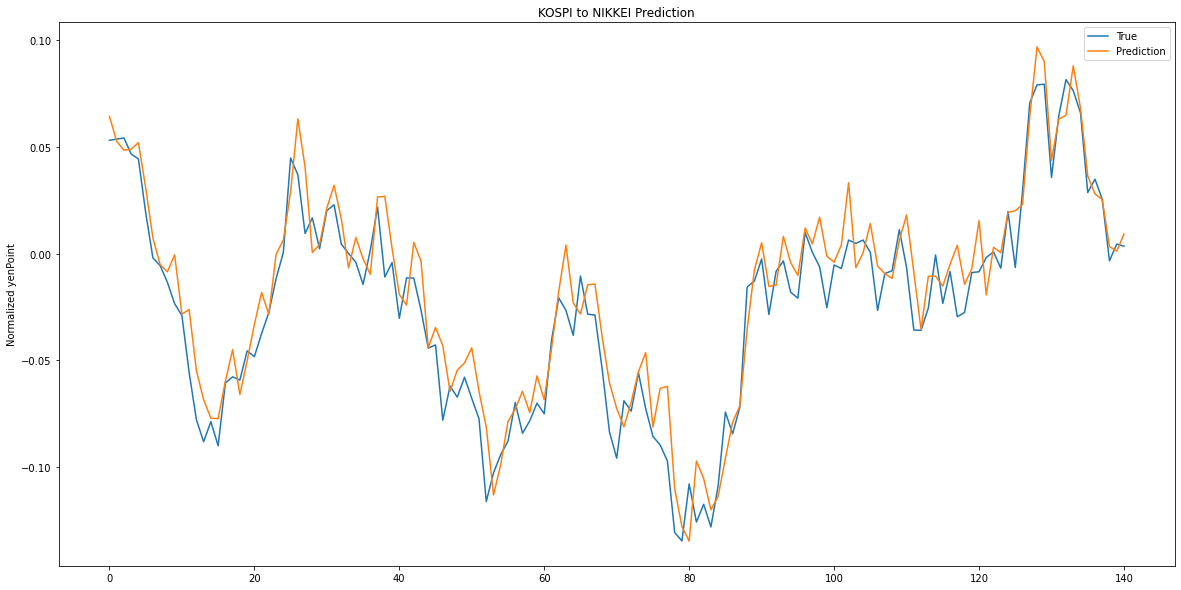

<Figure size 432x288 with 0 Axes>

In [36]:
pred_k2n = model_kospi.predict(x_nikkei)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_nikkei, label='True')
ax.plot(pred_k2n, label='Prediction')
ax.legend()
plt.ylabel('Normalized yenPoint')
plt.title('KOSPI to NIKKEI Prediction')
plt.show()

plt.clf()

# MSE 비교

In [47]:
error_n2n = pred_n2n - y_nikkei
mse_n2n = error_n2n.sum()

error_k2k = pred_k2k - y_kospi
mse_k2k = error_k2k.sum()

error_n2k = pred_n2k - y_kospi
mse_n2k = error_n2k.sum()

error_k2n = pred_k2n - y_nikkei
mse_k2n = error_k2n.sum()

print('Nikkei to Nikkei MSE: ', mse_n2n / error_n2n.shape[0])
print('KOSPI to KOSPI MSE: ', mse_k2k / error_k2k.shape[0])
print('Nikkei to KOSPI MSE: ', mse_n2k / error_n2k.shape[0])
print('KOSPI to Nikkei MSE: ', mse_k2n / error_k2n.shape[0])

Nikkei to Nikkei MSE:  1.056994971508014
KOSPI to KOSPI MSE:  1.1977931617192197
Nikkei to KOSPI MSE:  1.1426495948006603
KOSPI to Nikkei MSE:  1.0667359366869489
